In [1]:
# Import the required libraries
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get data from yahoo finance api
# read in the data using the yahoo finance API
name = (input("Enter ticker of your choice")).upper()
data = yf.download(name, start="2020-01-01", end="2023-01-01")

# compute the simple returns.
returns = data["Adj Close"].pct_change()

Enter ticker of your choice spy


[*********************100%***********************]  1 of 1 completed


In [3]:
# Compute the percentage difference between the cumulative and peak returns.

def drawdown(returns):
    """Determines the drawdown
    
    Parameters
    ----------
    returns : pd.Series
        Daily returns of an asset, noncumulative
    
    Returns
    -------
    drawdown : pd.Series
    
    """

    # replace the first nan value with 0.0
    returns.fillna(0.0, inplace=True)

    # create cumulative returns
    cumulative = (returns + 1).cumprod()

    # np.maximum.accumulate takes the running max value
    # of the input series. in this case, it will maintain
    # the running maximum value. this is the running
    # maximum return
    running_max = np.maximum.accumulate(cumulative)

    # compute the change between the cumulative return
    # and the running maximum return
    return (cumulative - running_max) / running_max

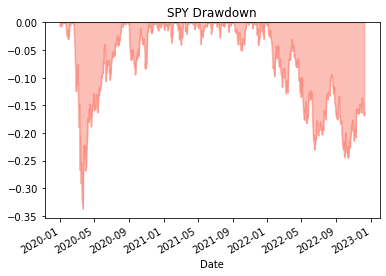

In [4]:
# plot
drawdown(returns).plot(kind="area", color="salmon", alpha=0.5,title=f"{name} Drawdown");

# Save the figure.
plt.savefig(f"./Images/{name}drawdown.jpg")

This chart shows SPY dropping 33.7% from its peak to trough return in 2020.

In [5]:
# use the drawdown to compute a max drawdown chart.
# The max drawdown differs from the drawdown by tracking the maximum drawdown of a 30-day rolling window of returns.

def max_drawdown(returns):
    """ Determines the maximum drawdown
    Parameters
    ----------
    returns : pd.Series
        Daily returns of an asset, noncumulative
    Returns
    -------
    max_drawdown : float
    """
    return np.min(drawdown(returns))

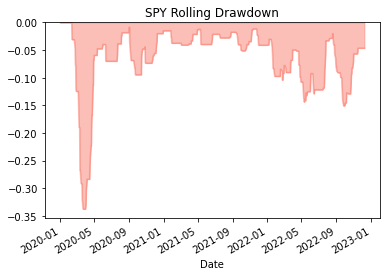

In [6]:
# plot

returns.rolling(30).apply(max_drawdown).plot(kind="area", color="salmon", alpha=0.5, title=f"{name} Rolling Drawdown");
# Save the figure.
plt.savefig(f"./Images/{name}rollingReturns.jpg")


Drawdown and max drawdown focus on capital preservation. It’s a useful indicator of the riskiness of a stock, portfolio, or strategy. Use it to help manage your risk.